<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-pandas-and-matplotlib-libraries" data-toc-modified-id="Load-the-pandas-and-matplotlib-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the pandas and matplotlib libraries</a></span></li><li><span><a href="#Do-a-boxplot-of-SAT-verbal-scores" data-toc-modified-id="Do-a-boxplot-of-SAT-verbal-scores-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Do a boxplot of SAT verbal scores</a></span></li><li><span><a href="#Show-some-descriptives-on-weeks-worked" data-toc-modified-id="Show-some-descriptives-on-weeks-worked-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Show some descriptives on weeks worked</a></span></li><li><span><a href="#Do-boxplots-of-weeks-worked" data-toc-modified-id="Do-boxplots-of-weeks-worked-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Do boxplots of weeks worked</a></span></li><li><span><a href="#Show-some-descriptives-for-the-Covid-data" data-toc-modified-id="Show-some-descriptives-for-the-Covid-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show some descriptives for the Covid data</a></span></li><li><span><a href="#Do-boxplots-of-cases-and-deaths-per-million" data-toc-modified-id="Do-boxplots-of-cases-and-deaths-per-million-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Do boxplots of cases and deaths per million</a></span></li><li><span><a href="#Show-the-boxplots-as-separate-subplots-on-one-figure" data-toc-modified-id="Show-the-boxplots-as-separate-subplots-on-one-figure-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Show the boxplots as separate subplots on one figure</a></span></li></ul></div>

# Load the pandas and matplotlib libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# pd.set_option('display.width', 80)
# pd.set_option('display.max_columns', 7)
# pd.set_option('display.max_rows', 200)
# pd.options.display.float_format = '{:,.0f}'.format

In [2]:
import watermark
%load_ext watermark

%watermark -n -i -iv

watermark : 2.1.0
json      : 2.0.9
pandas    : 1.2.1
matplotlib: 3.3.2



In [3]:
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace=True)

In [5]:
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

# Do a boxplot of SAT verbal scores

In [7]:
nls97['satverbal'].describe()

count    1406.000000
mean      499.724040
std       112.166256
min        14.000000
25%       430.000000
50%       500.000000
75%       570.000000
max       800.000000
Name: satverbal, dtype: float64

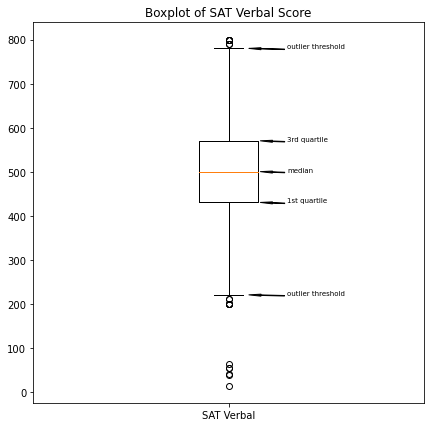

In [13]:
plt.figure(figsize=(7, 7))
plt.boxplot(nls97['satverbal'].dropna(), labels=['SAT Verbal'])
plt.annotate('outlier threshold',
             xy=(1.05, 780),
             xytext=(1.15, 780),
             size=7,
             arrowprops=dict(facecolor='black',
                             headwidth=2,
                             width=0.5,
                             shrink=0.02))
plt.annotate('3rd quartile',
             xy=(1.08, 570),
             xytext=(1.15, 570),
             size=7,
             arrowprops=dict(facecolor='black',
                             headwidth=2,
                             width=0.5,
                             shrink=0.02))
plt.annotate('median',
             xy=(1.08, 500),
             xytext=(1.15, 500),
             size=7,
             arrowprops=dict(facecolor='black',
                             headwidth=2,
                             width=0.5,
                             shrink=0.02))
plt.annotate('1st quartile',
             xy=(1.08, 430),
             xytext=(1.15, 430),
             size=7,
             arrowprops=dict(facecolor='black',
                             headwidth=2,
                             width=0.5,
                             shrink=0.02))
plt.annotate('outlier threshold',
             xy=(1.05, 220),
             xytext=(1.15, 220),
             size=7,
             arrowprops=dict(facecolor='black',
                             headwidth=2,
                             width=0.5,
                             shrink=0.02))
plt.title('Boxplot of SAT Verbal Score')
plt.show()

# Show some descriptives on weeks worked

In [14]:
weeksworked = nls97.loc[:, ['highestdegree', 'weeksworked16', 'weeksworked17']]
weeksworked.describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


# Do boxplots of weeks worked

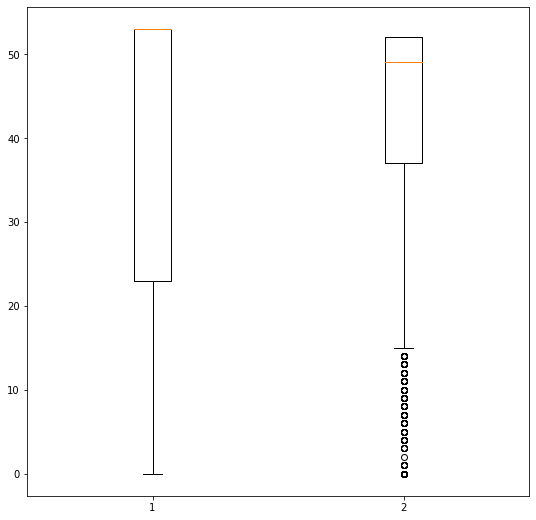

In [16]:
plt.figure(figsize=(9, 9))
plt.boxplot([
    weeksworked['weeksworked16'].dropna(),
    weeksworked['weeksworked17'].dropna()
])
plt.show()

# Show some descriptives for the Covid data

In [17]:
totvars = ['total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']

In [18]:
totvarslabels = ['cases', 'deaths', 'cases per million', 'deaths per million']

In [19]:
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.090000e+02,209.000000,209.000000,209.000000
mean,6.075741e+04,2702.952153,2297.022144,73.636522
std,2.724401e+05,11894.963052,4039.840203,156.341672
min,3.000000e+00,0.000000,1.229000,0.000000
25%,3.420000e+02,9.000000,202.834000,2.809000
50%,2.820000e+03,53.000000,868.866000,15.216000
75%,2.561100e+04,386.000000,2784.865000,58.374000
max,3.247684e+06,134814.000000,35795.159000,1237.551000


# Do boxplots of cases and deaths per million

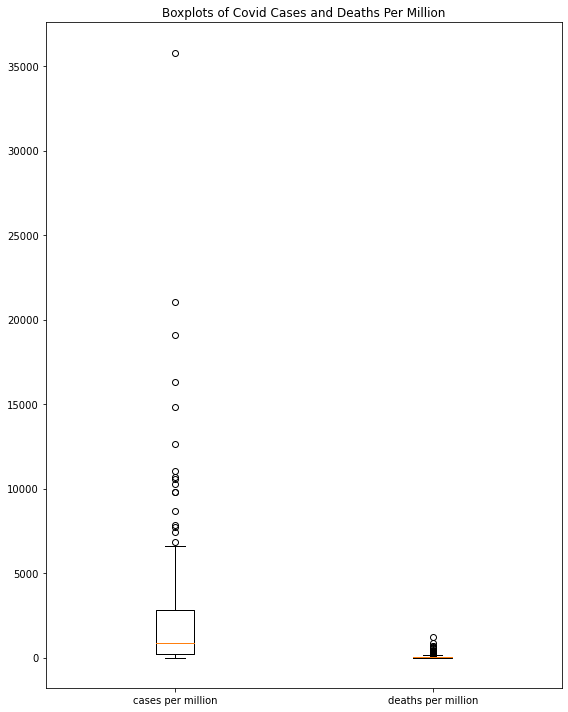

In [29]:
fig, ax = plt.subplots(figsize=(8, 10))
plt.title('Boxplots of Covid Cases and Deaths Per Million')
ax.boxplot(
    [covidtotalsonly['total_cases_pm'], covidtotalsonly['total_deaths_pm']],
    labels=['cases per million', 'deaths per million'])
plt.tight_layout()
plt.show()

# Show the boxplots as separate subplots on one figure

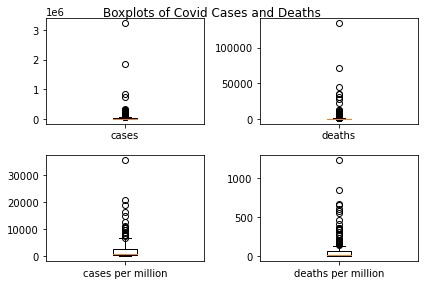

In [32]:
# fig, axes = plt.subplots(2, 2, figsize=(8, 10))
fig, axes = plt.subplots(2, 2)
plt.suptitle('Boxplots of Covid Cases and Deaths')
axes = axes.ravel()

for j, ax in enumerate(axes):
    ax.boxplot(covidtotalsonly.iloc[:, j], labels=[totvarslabels[j]])
plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()